In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving datasets.csv to datasets (2).csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['datasets.csv']))

In [ ]:
data.head()

,CropType,CropDays,SoilMoisture,temperature,Humidity,Irrigation
0,2,1,580,23,56,1
1,2,3,189,24,50,0
2,2,5,345,21,55,0
3,2,7,653,20,54,1
4,2,9,198,21,52,0


# data = pd.read_csv("D:/Minor Project/New folder (8)/datasets.csv")
# data.head()

In [ ]:
print(data['CropType'].unique())

[2 1 3 4 5 6 7 8 9]


In [ ]:
print(data.groupby('CropType').size())

CropType
1     78
2     50
3     47
4     45
5     51
6     59
7     18
8    102
9     51
dtype: int64


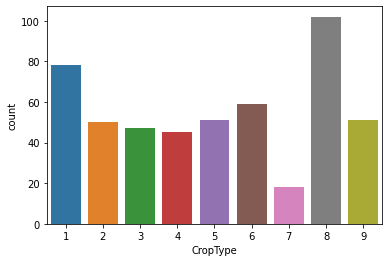

In [ ]:
sns.countplot(data['CropType'],label='count')
plt.show()

In [ ]:
from pandas.plotting import scatter_matrix
Y=data.iloc[:, 5]
X=data.iloc[:,-1]

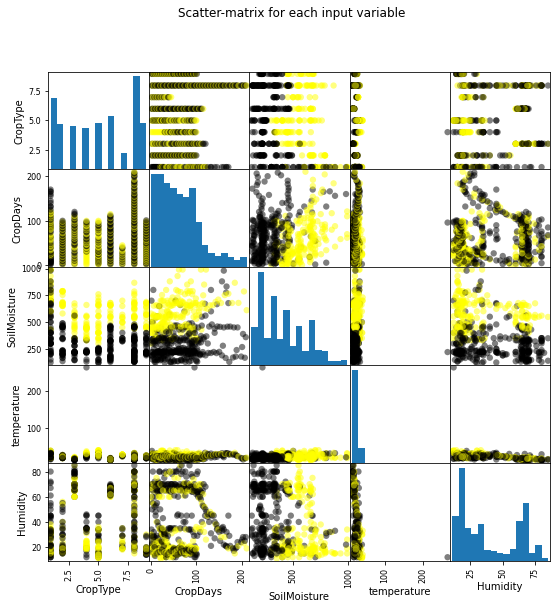

In [ ]:
from pandas.plotting import scatter_matrix
from matplotlib import cm
Components = ['CropType', 'CropDays', 'SoilMoisture', 'temperature', 'Humidity']
X = data[Components]
y = data['Irrigation']
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size = 0.2, random_state = 0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, Y_train)


In [ ]:
Y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[65  3]
 [ 3 30]]


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        68
           1       0.91      0.91      0.91        33

    accuracy                           0.94       101
   macro avg       0.93      0.93      0.93       101
weighted avg       0.94      0.94      0.94       101



In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
Y_pred = knn.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[66  2]
 [ 0 33]]


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, Y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        68
           1       0.94      1.00      0.97        33

    accuracy                           0.98       101
   macro avg       0.97      0.99      0.98       101
weighted avg       0.98      0.98      0.98       101



In [ ]:
#Gauss Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
Y_pred = gnb.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[63  5]
 [ 6 27]]


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        68
           1       0.84      0.82      0.83        33

    accuracy                           0.89       101
   macro avg       0.88      0.87      0.88       101
weighted avg       0.89      0.89      0.89       101



In [ ]:
#SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, Y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
Y_pred = svm.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[66  2]
 [ 4 29]]


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        68
           1       0.94      0.88      0.91        33

    accuracy                           0.94       101
   macro avg       0.94      0.92      0.93       101
weighted avg       0.94      0.94      0.94       101



In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
classifier = Sequential()
classifier.add(Dense( 3, init = "uniform", activation = "relu", input_dim = 5))

classifier.add(Dense( 3, init = "uniform", activation = "relu"))

classifier.add(Dense( 1, init = "uniform", activation = "sigmoid"))

classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ['accuracy'] )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, activation="relu", input_dim=5, kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


In [ ]:
classifier.fit(X_train, Y_train, batch_size = 10, nb_epoch = 100)

Epoch 1/100
400/400 [==============================] - 0s 118us/step - loss: 0.3008 - accuracy: 0.8700
Epoch 2/100
400/400 [==============================] - 0s 108us/step - loss: 0.3007 - accuracy: 0.8700
Epoch 3/100
400/400 [==============================] - 0s 107us/step - loss: 0.3008 - accuracy: 0.8700
Epoch 4/100
400/400 [==============================] - 0s 106us/step - loss: 0.3007 - accuracy: 0.8725
Epoch 5/100
 10/400 [..............................] - ETA: 0s - loss: 0.3933 - accuracy: 0.8000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


400/400 [==============================] - 0s 113us/step - loss: 0.3023 - accuracy: 0.8725
Epoch 6/100
400/400 [==============================] - 0s 105us/step - loss: 0.3017 - accuracy: 0.8700
Epoch 7/100
400/400 [==============================] - 0s 103us/step - loss: 0.3016 - accuracy: 0.8725
Epoch 8/100
400/400 [==============================] - 0s 101us/step - loss: 0.3013 - accuracy: 0.8750
Epoch 9/100
400/400 [==============================] - 0s 115us/step - loss: 0.3006 - accuracy: 0.8700
Epoch 10/100
400/400 [==============================] - 0s 109us/step - loss: 0.3003 - accuracy: 0.8725
Epoch 11/100
400/400 [==============================] - 0s 102us/step - loss: 0.3021 - accuracy: 0.8675
Epoch 12/100
400/400 [==============================] - 0s 103us/step - loss: 0.3013 - accuracy: 0.8700
Epoch 13/100
400/400 [==============================] - 0s 104us/step - loss: 0.3036 - accuracy: 0.8725
Epoch 14/100
400/400 [==============================] - 0s 105us/step - loss: 0.3